In [1]:
import pandas as pd
%matplotlib inline

In [2]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [3]:
import glob
filenames = glob.glob("trump_speeches-master/data/speech*")
filenames[:5]

['trump_speeches-master/data/speech_0.txt',
 'trump_speeches-master/data/speech_1.txt',
 'trump_speeches-master/data/speech_10.txt',
 'trump_speeches-master/data/speech_11.txt',
 'trump_speeches-master/data/speech_12.txt']

In [4]:
speeches = [open(filename).read() for filename in filenames]
len(speeches)

56

In [5]:
speeches_df = pd.DataFrame({
    'text': speeches,
    'filename': filenames
})
speeches_df.head(3)

,filename,text
0,trump_speeches-master/data/speech_0.txt,Remarks Announcing Candidacy for President in ...
1,trump_speeches-master/data/speech_1.txt,Remarks at the AIPAC Policy Conference in Wash...
2,trump_speeches-master/data/speech_10.txt,Remarks at the Washington County Fair Park in ...


In [6]:
speeches_df.loc[0]['text'][:200]

"Remarks Announcing Candidacy for President in New York City\nTrump: Wow. Whoa. That is some group of people. Thousands.So nice, thank you very much. That's really nice. Thank you. It's great to be at T"

In [7]:
speeches_df['name'] = speeches_df['text'].apply(lambda value: value.split("\n")[0])
speeches_df['content'] = speeches_df['text'].apply(lambda value: value.split("\n")[1])
del speeches_df['text']
speeches_df.head(2)

,filename,name,content
0,trump_speeches-master/data/speech_0.txt,Remarks Announcing Candidacy for President in ...,Trump: Wow. Whoa. That is some group of people...
1,trump_speeches-master/data/speech_1.txt,Remarks at the AIPAC Policy Conference in Wash...,Good evening. Thank you very much. I speak to...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, norm='l1')
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.000677,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.001321,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
speeches_df['negative'] = wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil', 'dislike', 'terrible', 'nasty']].sum(axis=1)
speeches_df.head(3)

,filename,name,content,negative
0,trump_speeches-master/data/speech_0.txt,Remarks Announcing Candidacy for President in ...,Trump: Wow. Whoa. That is some group of people...,0.010825
1,trump_speeches-master/data/speech_1.txt,Remarks at the AIPAC Policy Conference in Wash...,Good evening. Thank you very much. I speak to...,0.014170
2,trump_speeches-master/data/speech_10.txt,Remarks at the Washington County Fair Park in ...,It's so great to be here tonight. I am honored...,0.007926


In [18]:
speeches_df['positive'] = wordcount_df[['fancy', 'love', 'admire', 'delight', 'dear', 'good', 'inspire', 'care']].sum(axis=1)
speeches_df.head(3)

,filename,name,content,negative,positive
0,trump_speeches-master/data/speech_0.txt,Remarks Announcing Candidacy for President in ...,Trump: Wow. Whoa. That is some group of people...,0.010825,0.025034
1,trump_speeches-master/data/speech_1.txt,Remarks at the AIPAC Policy Conference in Wash...,Good evening. Thank you very much. I speak to...,0.014170,0.008097
2,trump_speeches-master/data/speech_10.txt,Remarks at the Washington County Fair Park in ...,It's so great to be here tonight. I am honored...,0.007926,0.011889


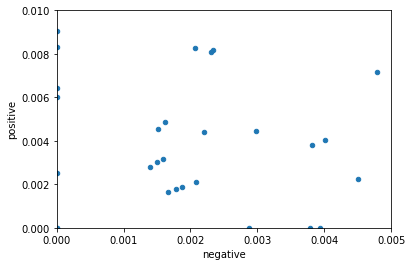

In [19]:
speeches_df.plot(x='negative', 
                 y='positive', 
                 kind='scatter', ylim=(0,0.01), xlim=(0,0.005))